Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  (Here we need to find the Feature with the highest importance that contributes to the Dependent variable  Sale .In this problem we will use the Decision algorithm as Feature selection algoritm)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

In [2]:
df = pd.read_csv("Company_data.csv")
df.describe()
df.isna().sum()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


No null values exists.
Shelveloc,Urban and US are all categorial and hence need to be encoding.

In [3]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Select object columns
object_columns = df.select_dtypes(include=['object']).columns

# Create a dictionary to store the mapping of encoded values to original string values
label_dict = {}

# Apply label encoding to each object column and store the mapping in label_dict
for col in object_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_dict[col] = dict(zip(le.transform(le.classes_), le.classes_))
    print(col,label_dict[col])
# Print the mapping of encoded values to original string values for the  column

ShelveLoc {0: 'Bad', 1: 'Good', 2: 'Medium'}
Urban {0: 'No', 1: 'Yes'}
US {0: 'No', 1: 'Yes'}


In [4]:

x = df.iloc[:,1:]
y = df.iloc[:,0]


xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)



In [5]:
from sklearn.metrics import r2_score
dt = DecisionTreeRegressor()

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

r2_score(ytest,ypred)

0.23854273888139288

In [6]:
print(dt.score(xtrain,ytrain))
dt.score(xtest,ytest)

1.0


0.23854273888139288

In [7]:
# create a DataFrame with feature importances and column names
feat_imp = pd.DataFrame({'feature': x.columns, 'importance': dt.feature_importances_})

# sort the DataFrame in descending order of feature importance
feat_imp = feat_imp.sort_values('importance', ascending=False)

# print the DataFrame
feat_imp


,feature,importance
5,ShelveLoc,0.339712
4,Price,0.277747
0,CompPrice,0.098799
6,Age,0.084807
2,Advertising,0.056294
1,Income,0.052476
7,Education,0.050603
3,Population,0.030455
8,Urban,0.006279
9,US,0.002829


Here we can see our model is facing overfitting problem hence here we will do hyperparameter tuning.

# Hyperparameter Tuning

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
params = {
    'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'splitter' : ['best','random'],
    'max_depth' : [2,3,4,5,6,7,8,9]
    }

In [10]:

grid = GridSearchCV(DecisionTreeRegressor(), param_grid=params,verbose=1)

In [11]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             verbose=1)

In [12]:
grid.best_params_

{'criterion': 'friedman_mse', 'max_depth': 6, 'splitter': 'best'}

In [13]:
dt = DecisionTreeRegressor(criterion='squared_error', max_depth=9, splitter='best')

In [14]:
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)

print(dt.score(xtrain,ytrain))
dt.score(xtest,ytest)

0.9640289119094879


0.30420860306522357

In [15]:
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.dpi'] = 250

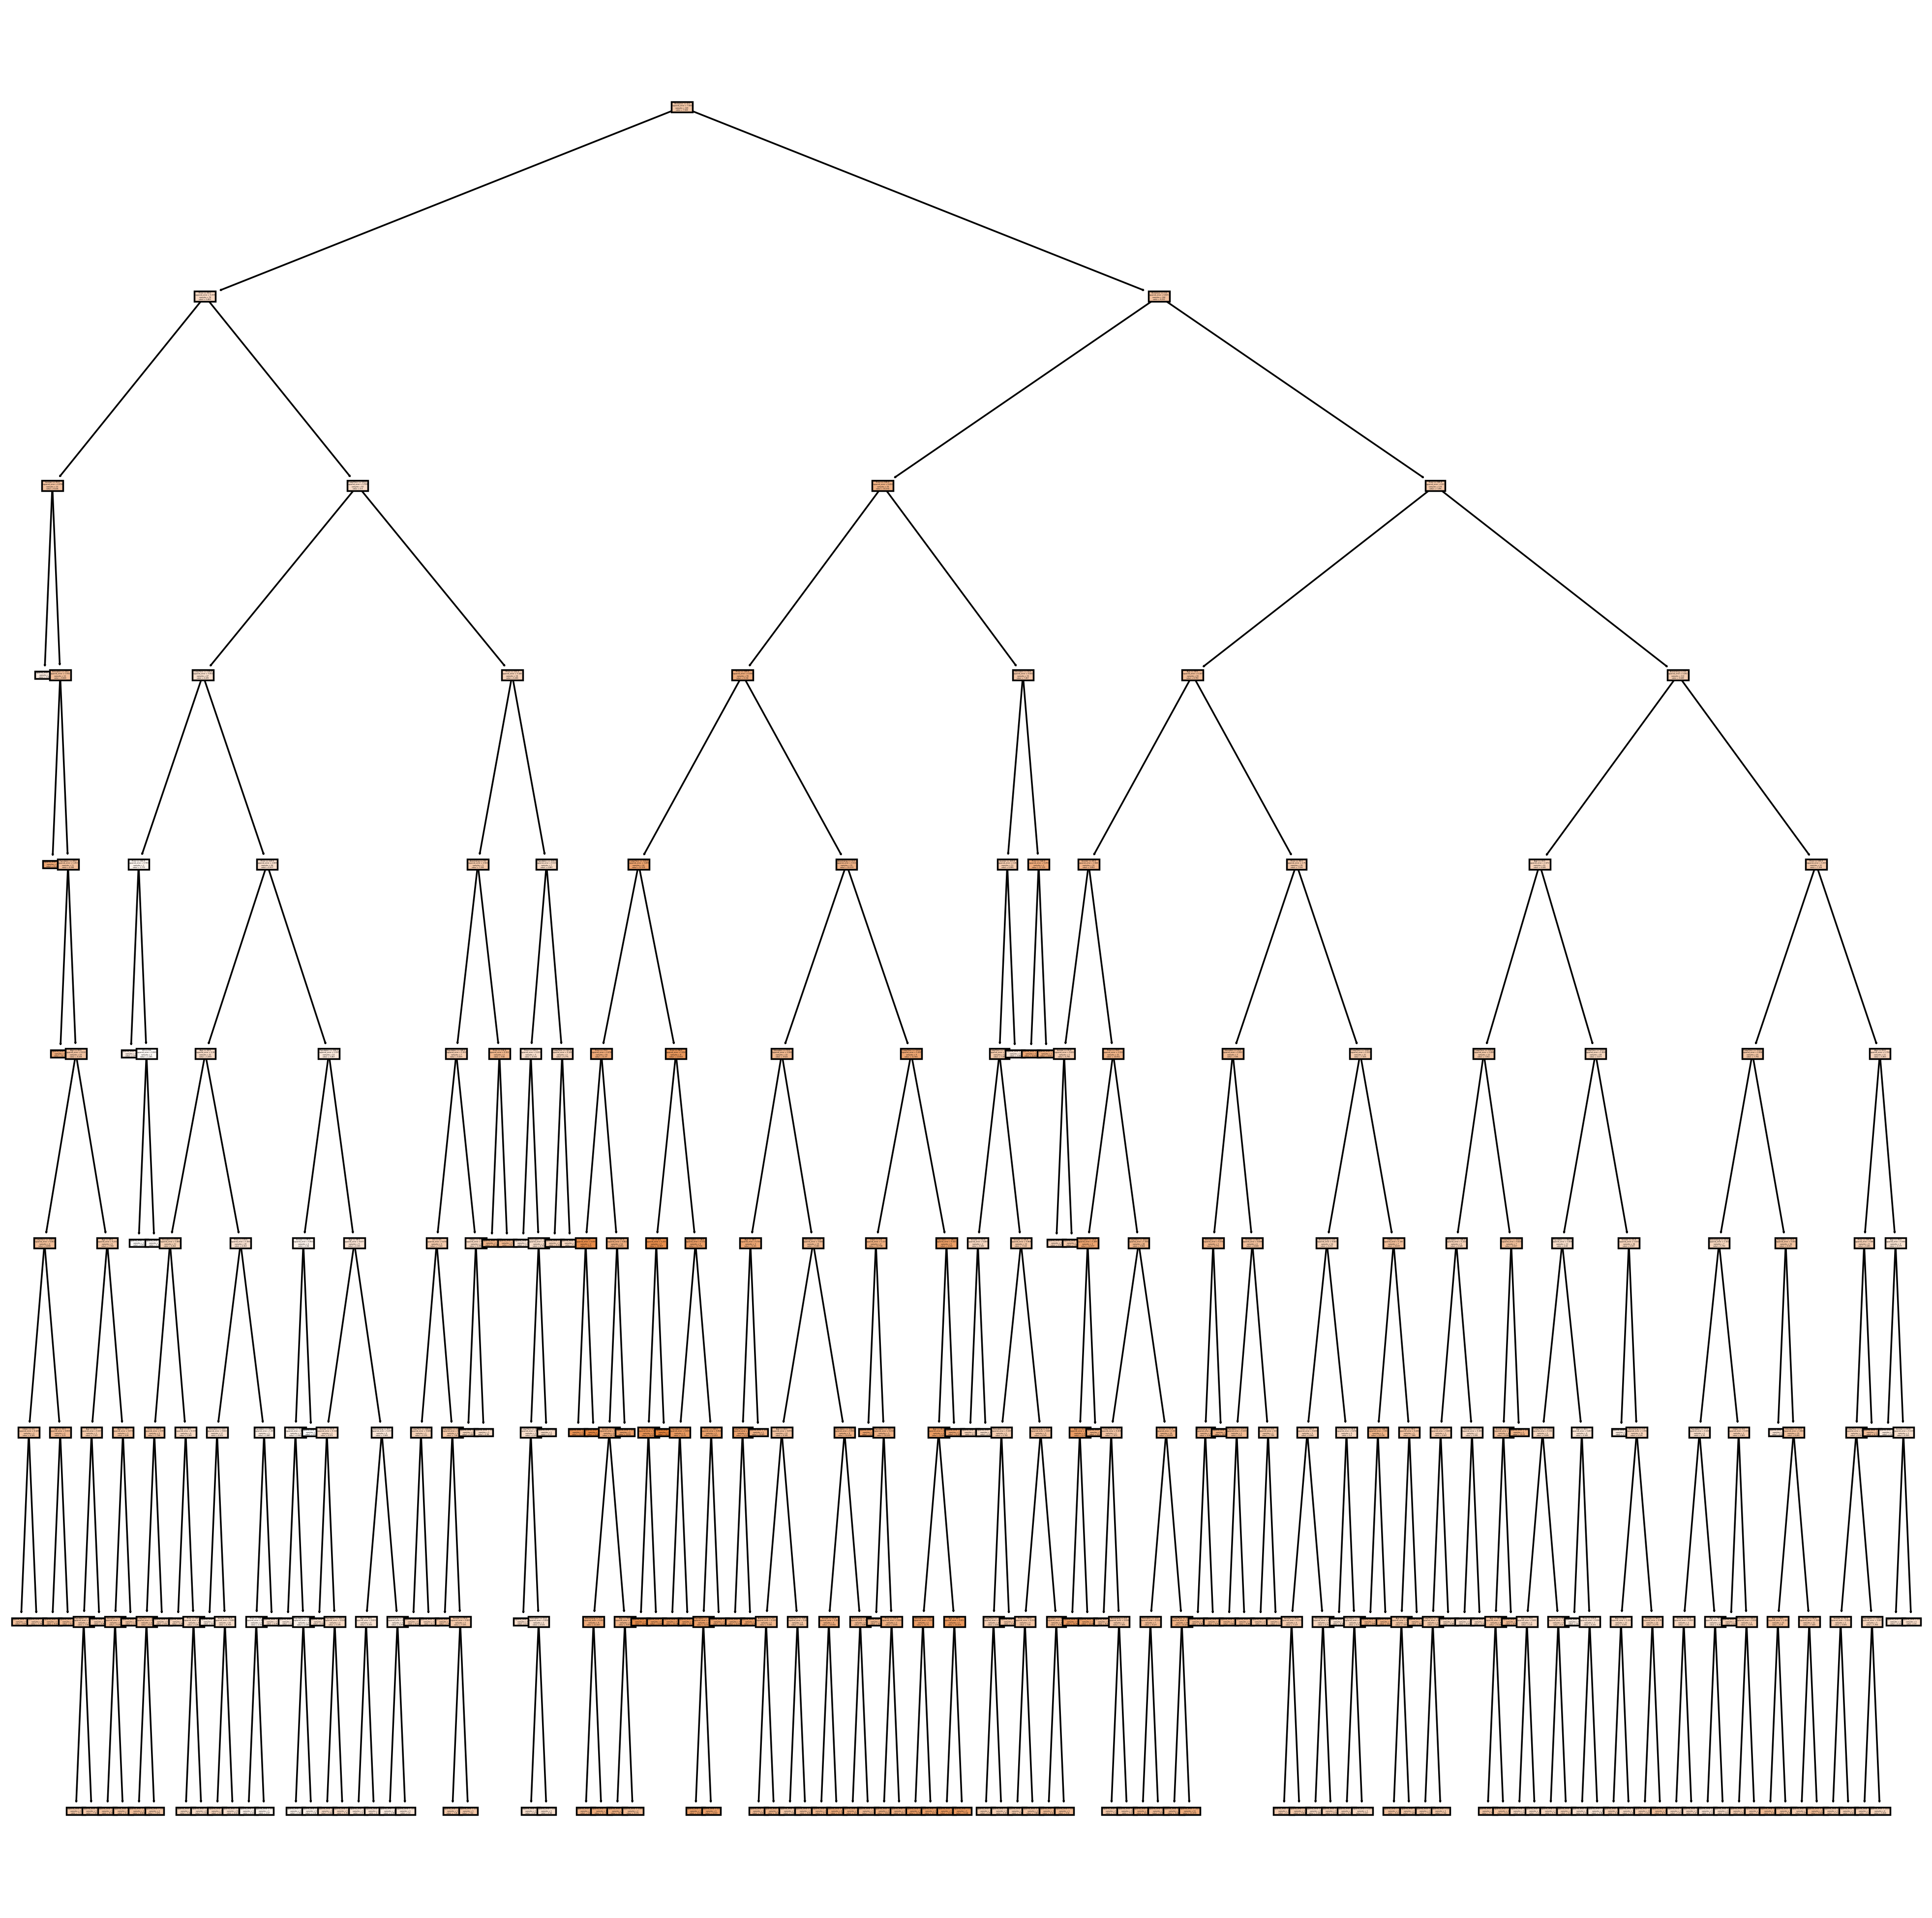

In [16]:
tree.plot_tree(dt, feature_names=x.columns, filled=True)
plt.show()

In [17]:
# create a DataFrame with feature importances and column names
feat_imp = pd.DataFrame({'feature': x.columns, 'importance': dt.feature_importances_})

# sort the DataFrame in descending order of feature importance
feat_imp = feat_imp.sort_values('importance', ascending=False)

# print the DataFrame
feat_imp



,feature,importance
5,ShelveLoc,0.352388
4,Price,0.281049
0,CompPrice,0.097071
6,Age,0.081387
2,Advertising,0.053319
7,Education,0.049939
1,Income,0.049085
3,Population,0.028487
8,Urban,0.004844
9,US,0.002431


Since our goal of the problem is to identify the importance of the Attributes hence we have found the feature and their corresponding importance.
Answer to our Problem statment is the most important feature contributing for Sale is ShelveLoc and next is Price